### Imports

In [1]:
from functions_watervalues import *

### Exact calculation with solver

In [2]:
td = time()
V_exact_solver = SDP_exact(False)  # Les valeurs de Bellman de la semaine s correspondent aux valeurs pour le début de la semaine s soit la fin de la semaine s-1  
print(time()-td)

67.04233455657959


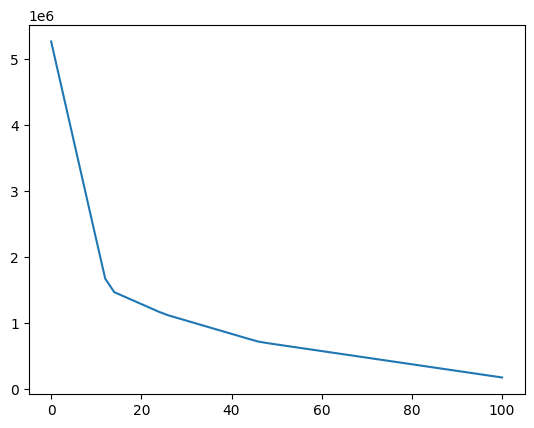

In [3]:
s = 51
plt.plot(np.linspace(0,100,xNsteps),V_exact_solver[:,s])

### Precalculated rewards

In [4]:
Lu= np.zeros((Ncontrols, S, NTrain))
for u in range(Ncontrols):
    Lu[u,:,:] =  WeeklyCost(U[u])  

In [5]:
Gu = np.zeros((Ncontrols, S, NTrain))
for u in range(Ncontrols):
    Gu[u, :, :] = Lu[(U>=0).argmax(), :, :] - Lu[u, :, :]

In [6]:
V_tilde = SDP_precalculated_rewards(False, Gu)
V_non_tilde = SDP_precalculated_rewards(True, Gu)

In [7]:
L_U0 = np.zeros(S+1)

for s in range(S):
    L_U0[s] = np.mean(np.sum(Lu[(U>=0).argmax(), s:52, :], axis=0))

In [8]:
penalties = np.zeros((51, 53))
for s in range(S+1):
    pen = get_penalties(True,s)
    for i in range(xNsteps):
        penalties[i,s] = pen(X[i])

In [13]:
s = 0
i = 1
j = 51
# i = findfirst(STATES.>=Xmin[s-1]);
# j = findlast(STATES.<=Xmax[s-1]);

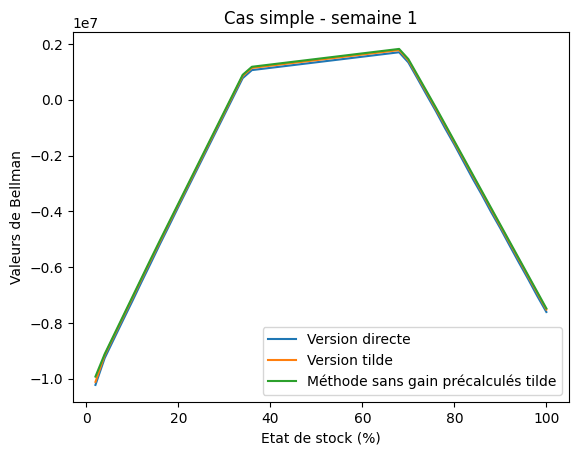

In [14]:
plt.title(f"Cas simple - semaine {s+1}")
plt.xlabel("Etat de stock (%)") 
plt.ylabel("Valeurs de Bellman")
plt.plot(X[i:j]/XmaxB*100, V_non_tilde[i:j, s], label="Version directe")
plt.plot(X[i:j]/XmaxB*100, V_tilde[i:j, s]+penalties[i:j,s], label="Version tilde")
plt.plot(X[i:j]/XmaxB*100, L_U0[s] - V_exact_solver[i:j, s]+penalties[i:j,s], label="Méthode sans gain précalculés tilde")
# plt.plot(X[i:j]/XmaxB*100, penalties[i:j, s], label="Pénalités")
plt.legend()